# **1. Preparando o ambiente de trabalho**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as m
import seaborn as sns
from collections import Counter

# **2. Objetivos**

O objetivo deste trabalho é realizar uma análise exploratória de dados do conjunto de dados "Adult" do UCI Machine Learning Repository. E criar um modelo de classificação que classifique os respondentes da pesquisa de acordo com a renda a partir das variáveis de característica, obtendo valores corretos para a variável alvo.


# **3. O Dataset**

O conjunto de dados "Adult" contém informações sobre renda, educação, idade, sexo e raça, etc. O conjunto de dados contém *48.842* entradas com um total de 15 colunas representando diferentes atributos das pessoas, conforme a tabela abaixo. O conjunto de dados foi divido previamente em dois datasets, o dataset de de treino **adult.data** que contém *32.560* entradas, e o dataset de testes **adult.test** que contém *16.282* entradas. Os dados foram coletados em 1994 e a variável alvo,  **Renda** (*income*) é dividida em duas classes: *"Alta Renda"* ($\gt50K$) e *"Baixa Renda"* ($\leq50K$).





| Coluna          | Variável                  | Definição                                                                                     | Tipo de Variável                             | Tipo de Dado |
| :------------  | :------------            | :------                                                                                       | :------                                      |  ----:       |
| age             |  Idade                    |   Idade do respondente                                                                        |   Discreta (de 17 a 90)                      |  int64       |
| workclass       |  Classe de trabalho       |   Classificação do trabalho do respondente                                                    |   Categórica (9 categorias)                     |  object      |
| fnlwgt          |  Peso final               |   O número de pessoas que o censo acredita\\ que a entrada representa                           |   Discreta                                   |  int64       |
| education       |  Escolaridade             |   O nível de escolaridade mais elevado obtido pelo respondente                                |   Ordinal (16 categorias)                    |  object      |
| education-num   |  Número de escolaridade   |   O número de anos de escolaridade do respondente                                             |   Discreta (de 1 a 16)                       |  int64       |
| marital-status  |  Estado Civil             |   O estado civil do respondente                                                               |   Categórica (7 categorias)                     |  object      |
| occupation      |  Ocupação                 |   Qual o tipo de trabalho do respondente                                                      |   Categórica (15 categorias)                    |  object      |
| relationship    |  Relacionamento familiar  |   Tipo de relacionamento familiar do respondente                                              |   Categórica (6 categorias)                     |  object      |
| race            |  Raça                     |   A raça do respondente                                                                       |   Categórica (5 categorias)                     |  object      |
| sex             |  Sexo                     |   O sexo do do respondente                                                                    |   Categórica (2 categorias)                     |  object      |
| capital-gain    |  Ganho de capital         |   Valor de ganhos de capital o respondete obteve sobre sua poupança, investimentos e pensão   |   Contínua                                   |  int64       |
| capital-loss    |  Perda de capital         |   Valor de perda de capital o respondete obteve sobre sua poupança, investimentos e pensão    |   Contínua                                   |  int64       |
| hours-per-week  |  Horas por semana         |   Quantidade de horas trabalhadas por semana pelo respondente                                 |   Discreta (de 1 a 99)                       |  int64       |
| native-country  |  País de origem           |   Nacionalidade do respondente                                                                |   Categórica (42 países)                        |  object      |
| income          |  Renda                    |   Classificação se o respondente é de baixa ou de alta renda                                  |   Booleano (≤ USD 50 mil, > USD 50 mil)      |  object      |

Os dados foram obtidos do repositório *UCI Machine Learning Repository* por meio do download do arquivo *.zip* que contém os arquivos *adult.data*, *adult.names*, *adult.test*, *Index*, *old.adult.names*. Então usamos o arquivo *adult.data*, que contém o dataset de treino, e transformando-o em um Pandas Dataframe.

In [2]:
# Carregando os dados dos arquivos baixados do site UCI Machine Learning.

colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data = pd.read_csv('data/adult.data', sep = ', ', names = colunas, na_values = '?', engine = 'python', skiprows = 1)

In [3]:
# Visualizando o dataset
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Observando o formato do Dataframe
data.shape

(32560, 15)

Verificando a distribuição da variável alvo, Renda, no dataset.

In [5]:
data['income'].value_counts()

income
<=50K    24719
>50K      7841
Name: count, dtype: int64

In [6]:
# Driando função para avaliar a simetria entre os valores de cada categoria de renda no dataset.

def simet_Renda(data):
  rotulo = data.values[:, -1]
  contador = Counter(rotulo)
  for key, value in contador.items():
      porcentagem = value / len(rotulo) * 100
      print(f"A Classe: {key}, tem o total de {value} indivíduos, o que representa {porcentagem:.2f}% dos dados coletados.")

In [7]:
# Calculando a porcentagem de cada categoria de renda

simet_Renda(data)

A Classe: <=50K, tem o total de 24719 indivíduos, o que representa 75.92% dos dados coletados.
A Classe: >50K, tem o total de 7841 indivíduos, o que representa 24.08% dos dados coletados.


Nota-se que há uma grande assimetria de renda entre os participantes da pesquisa, com aqueles considerados de baixa renda ($\leq50K$) apresentando mais de três vezes o número de participantes considerados de alta renda ($\gt50K$).




Observamos, então, as variáveis do dataset junto com seus tipos de dados e a presença de valores faltantes.

In [8]:
# Informações sobre as colunas e os dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Há valores faltantes em algumas colunas, que deverão que ser tratados posteriormente. Por hora, faremos a substituição dos valores faltantes do caractere "**?**" para o objecto **nan**. E em seguida contaremos quantos valores desconhecidos há em cada coluna.

In [9]:
# Substituindo os valores faltantes do caractere '?' para o objeto nan,

from numpy import nan
data = data.replace('?',nan)

In [10]:
# Criando funlção para calcular os número e a percentagem de valores faltantes em cada coluna

def valoresFaltantes(data):
		valores_faltantes = data.isnull().sum()
		valores_faltantes = pd.DataFrame(valores_faltantes, columns= ['Valores Faltantes'])
		j=1
		sum_total=len(data)
		valores_faltantes['Porcentagem'] = round(( (valores_faltantes['Valores Faltantes'] / sum_total) * 100), 3)
		round(valores_faltantes, 3)
		return valores_faltantes.sort_values('Porcentagem',ascending=False)


In [11]:
# Calculando o número, a percentagem dos valores faltantes.

valoresFaltantes(data)

,Valores Faltantes,Porcentagem
occupation,1843,5.660
workclass,1836,5.639
native-country,583,1.791
age,0,0.000
fnlwgt,0,0.000
education,0,0.000
education-num,0,0.000
marital-status,0,0.000
relationship,0,0.000
race,0,0.000


Há valores faltantes apenas nas variáveis ***workclass***, ***occupation*** e ***native-country***, onde é possível notar que o número de valores faltantes nas variáveis ***workclass*** e ***occupation*** são praticamente iguais. Logo, quase sempre que houver um valor faltante em ***workclass***, haverá um valor faltante em ***occupation***.

# **4 Explorando as variáveis**

Separando as variáveis numéricas e categóricas em conjuntos de dados diferentes para tratá-las separadamente.

In [12]:
# Criando conjuntos de dados diferentes para as variáveis numéricas e categóricas.

num_data= data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
cat_data= data.select_dtypes(include=['object'])

## **4.1 Explorando as variáveis numéricas**

Usamos o método **.describe** do Pandas para fazemos um sumário com as estatísticas descritivas básicas de todas as vairáveis numéricas, como os valores mínimos, médios, máximos, desvio padrão, etc.

In [13]:
# Sumário das variáveis numéricas

pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000,32560.000,32560.000,32560.000,32560.000,32560.000
mean,38.582,189781.814,10.081,1077.615,87.307,40.437
std,13.641,105549.765,2.573,7385.403,402.966,12.348
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117831.500,9.000,0.000,0.000,40.000
50%,37.000,178363.000,10.000,0.000,0.000,40.000
75%,48.000,237054.500,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


Plotamos os histogramas com as distribuições de todas as variáveis numéricas

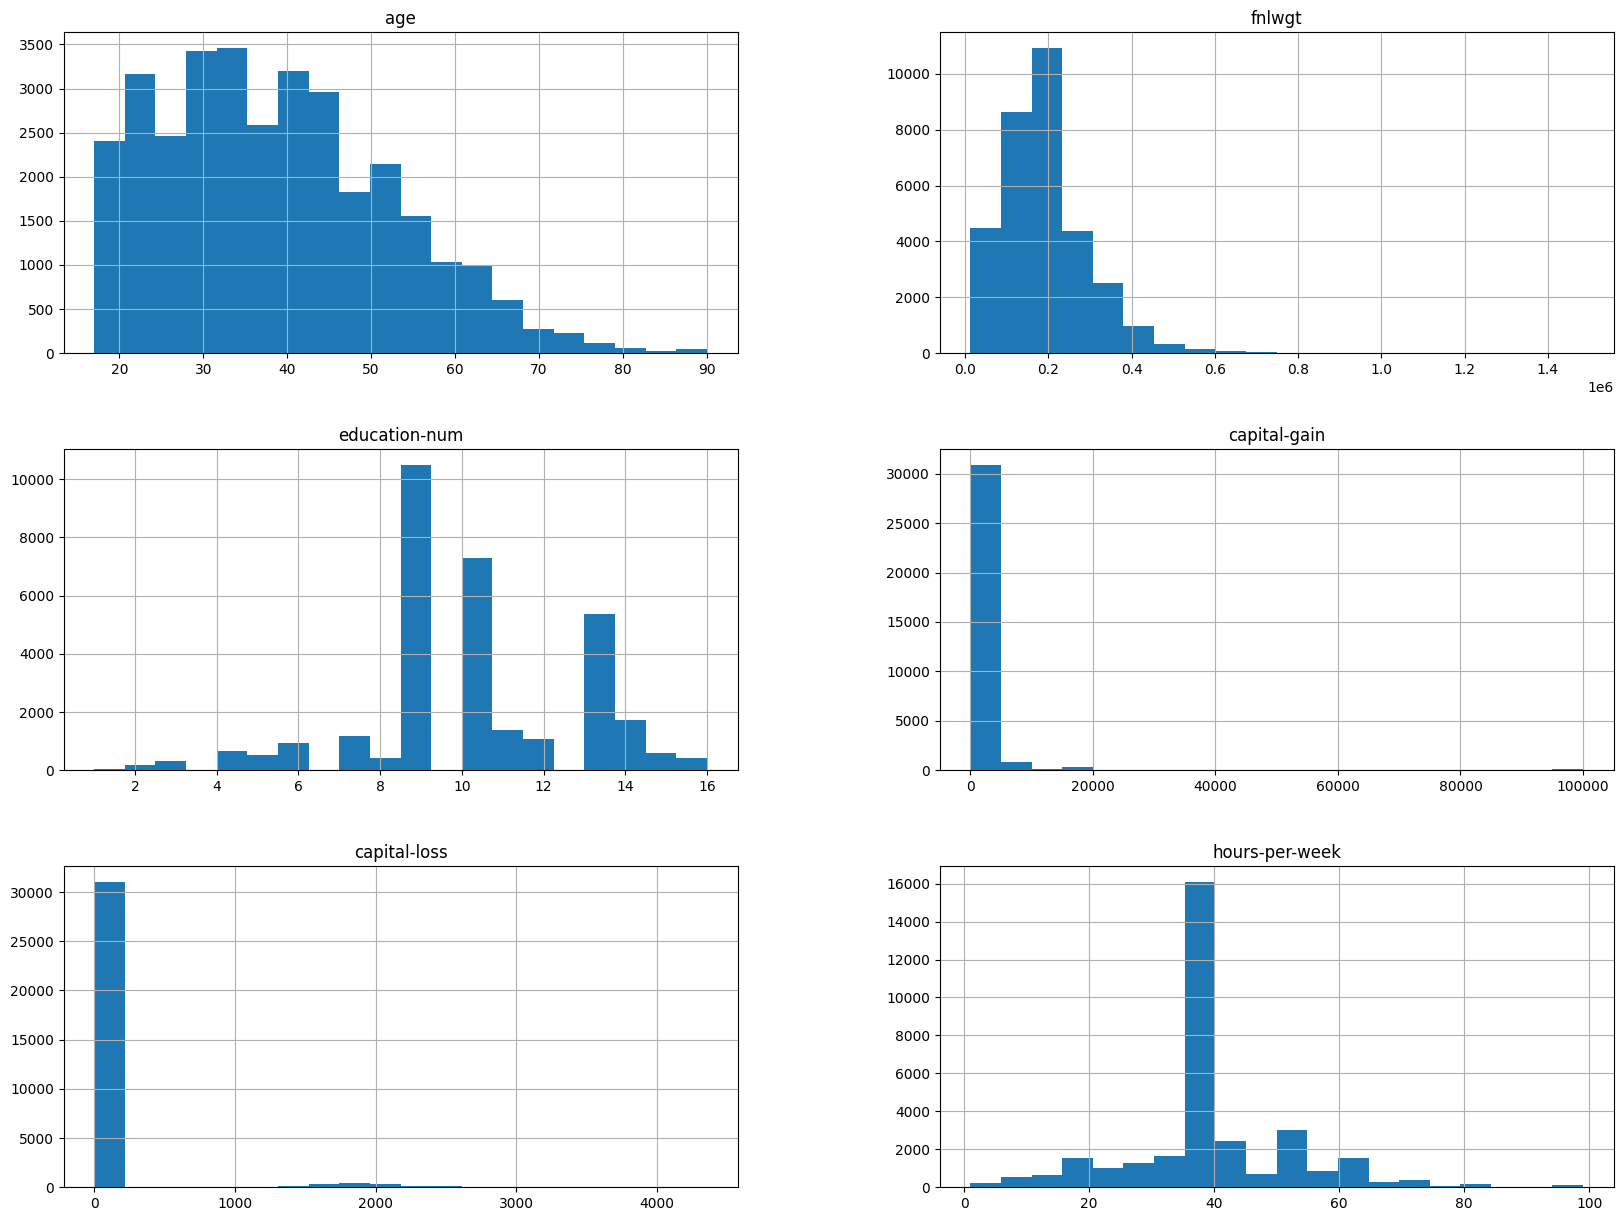

In [14]:
num_data.hist(bins=20, figsize=(20, 15))
plt.show()

##### **Observações:**



*   O pico da variável **idade** é idade abaixo de 50 anos.
*   O máximo da variável **fnlwgts** está abaixo de 400k.
*   Muito poucas pessoas investem em capital e há alguns casos discrepantes, como:
    *   Pessoas que ganham mais de US$ 90.000,00 por meio de **ganhos de capital**.
    *   No entanto, para pessoas que sofreram uma **perda de capital** a perda média é de cerca de USD 2.000,00.
*   A maioria das pessoas tem 9, 10 e 14 **anos de escolaridade**.
*   A maioria das pessoas trabalha cerca de 40 **horas por semana**.
    *   Também há outliers como alguns casos de pessoas trabalhando 100 **horas por semana**.





#### **Correlações entre as variáveis numéricas**

Iremos, então, analisar a correlação entre as variáveis numéricas.

In [15]:
# Criando Função para gerar o heatmap com as correlações das variáveis numéricas.

def heatMap(data):
  sns.heatmap(data.corr(), annot=True, fmt='.2f')
  #print(data.corr())

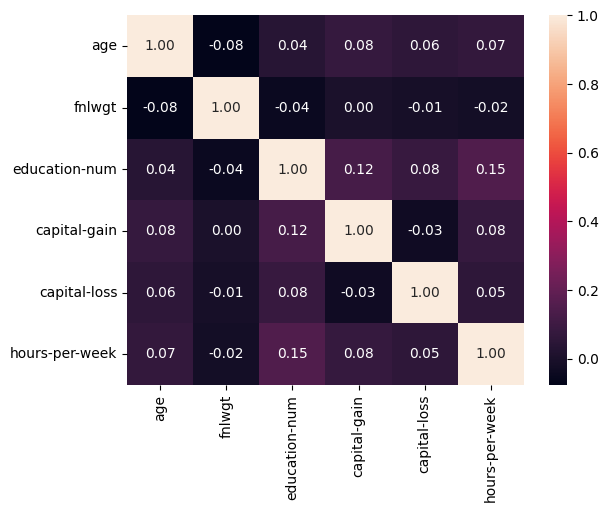

In [16]:
heatMap(num_data)

##### **Observações:**

*   A variável **fnlwgt** não uma correlação significativa com nenhuma das outras variáveis, portanto é uma variável inútil para a Análise e para o modelo de Machine Learning.
*   As variáveis **número de escolaridade**, **horas trabalhadas por semana** e **idade** têm algumas correlações que vale a pena explorar e podem ser melhoradas.
*   As variáveis **ganho de capital** e **perda de capital** apresentam correlação ligeiramente negativa.

#### **Relações entre as variáveis numéricas e a Renda**

In [17]:
pd.pivot_table(data, index= ['income'], values=num_data.columns)

,age,capital-gain,capital-loss,education-num,fnlwgt,hours-per-week
income,,,,,,
<=50K,36.784,148.671,53.145,9.595,190345.429,38.840
>50K,44.250,4006.142,195.002,11.612,188005.000,45.473


##### **Observações:**

*   Pessoas com maior **renda** apresentam valores elevados em todos os atributos.
*   Não há diferença significativa nos valores da variável **fnlwgt** em relação à **renda**.

## **4.2 Explorando as variáveis categóricas**

Começaremos plotando os gráficos de barra de todas as variáveis categóricas.

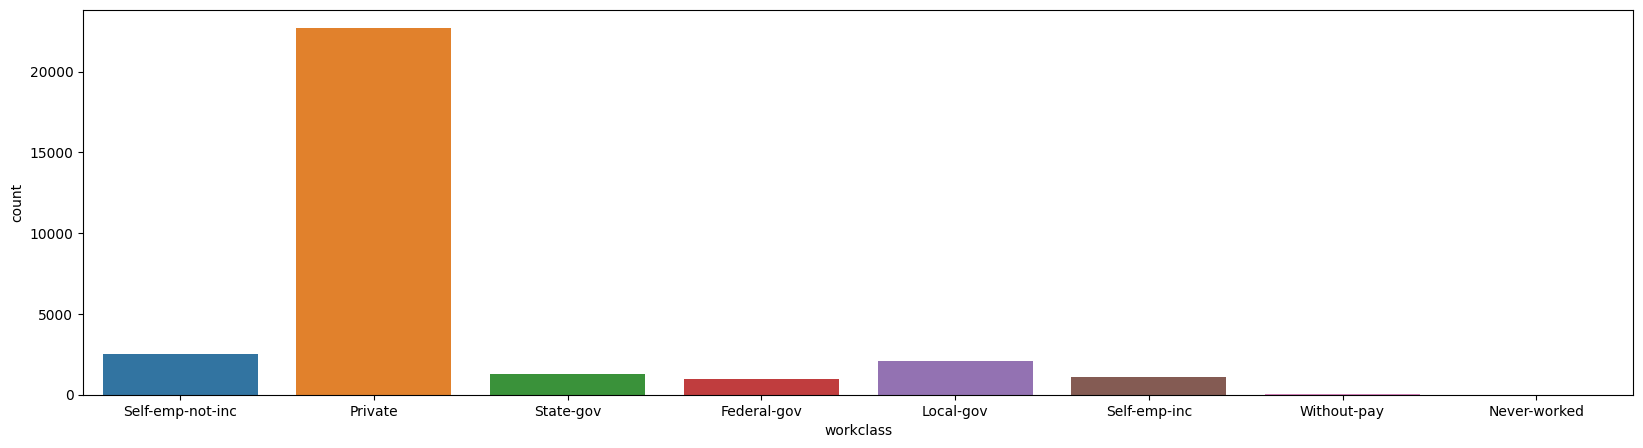

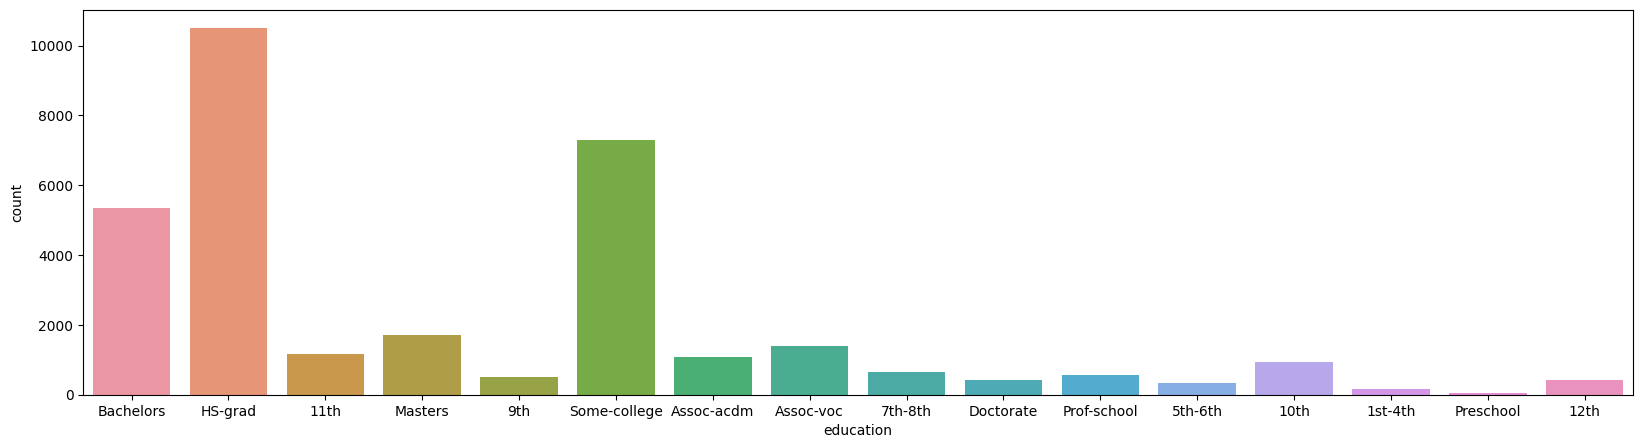

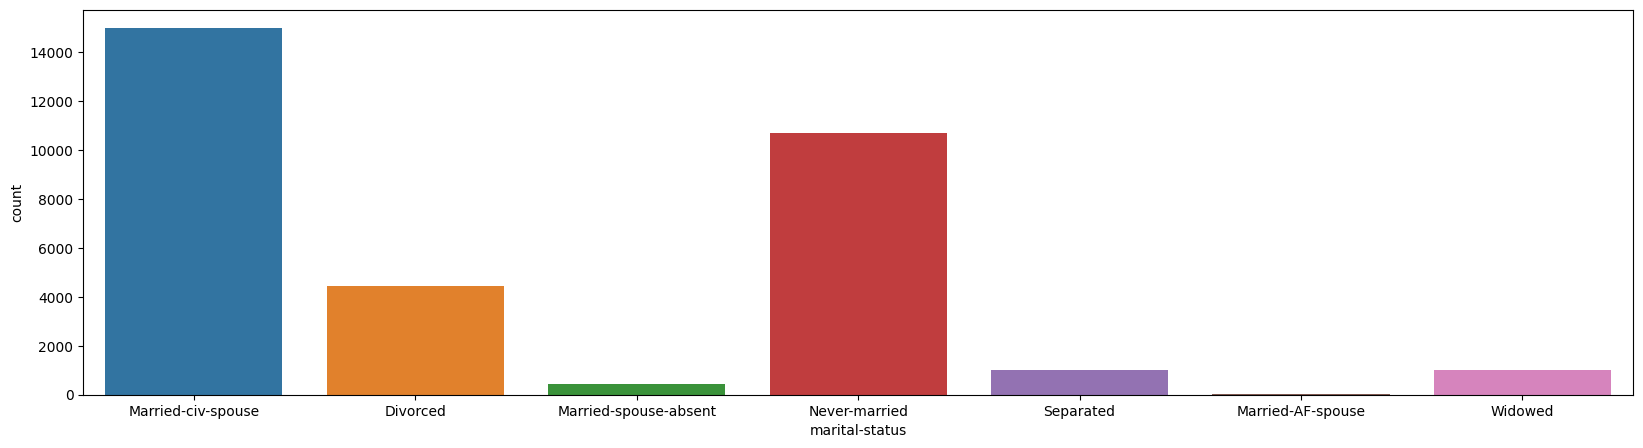

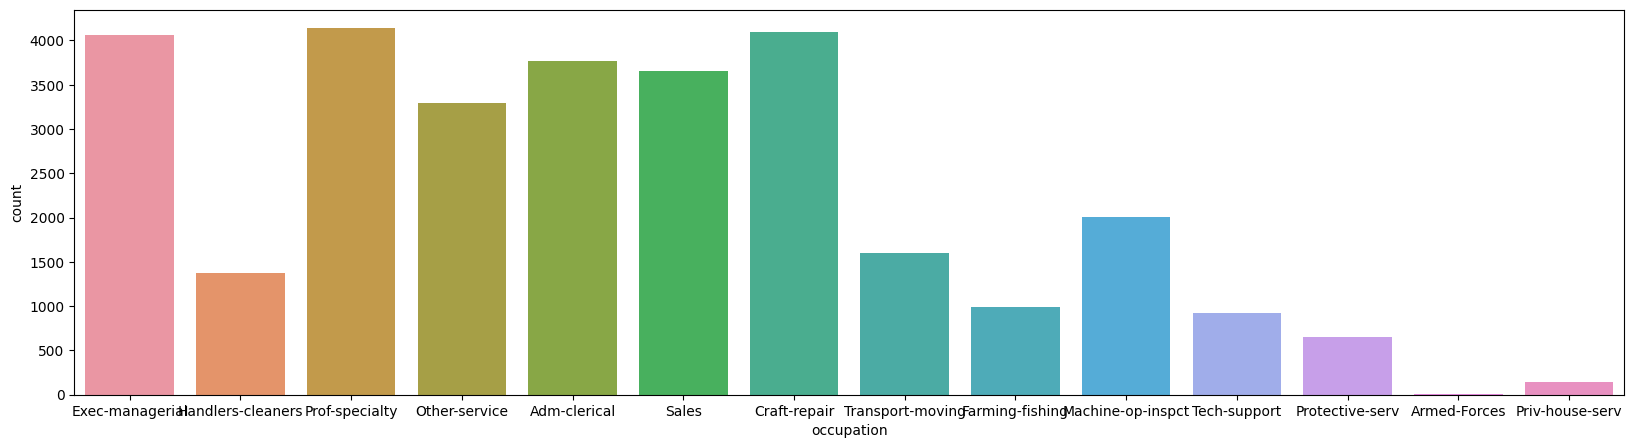

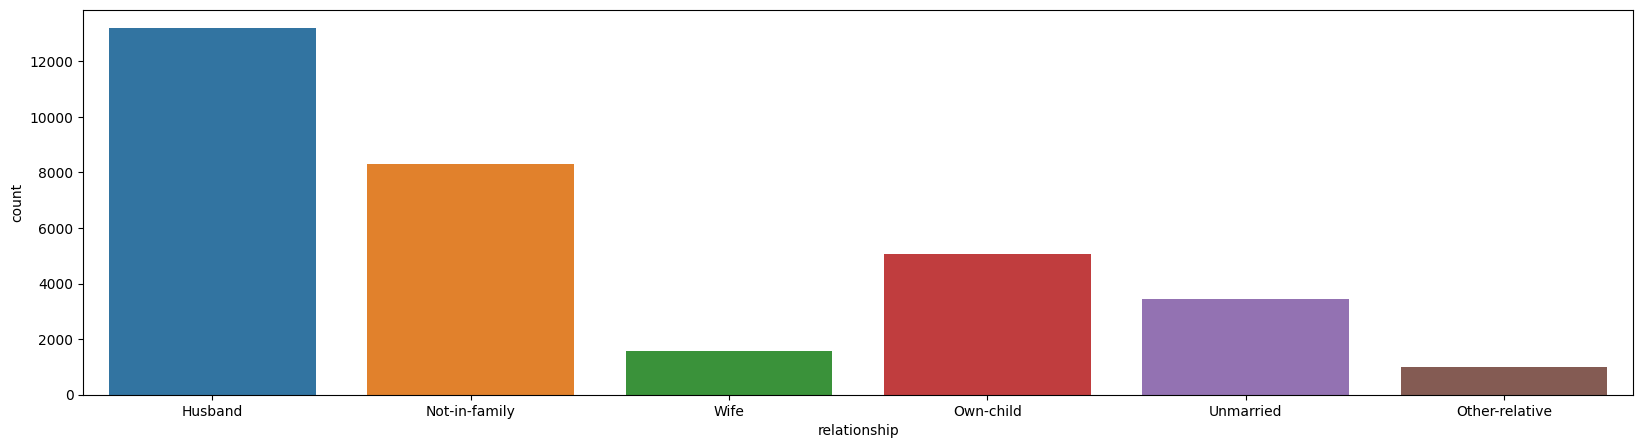

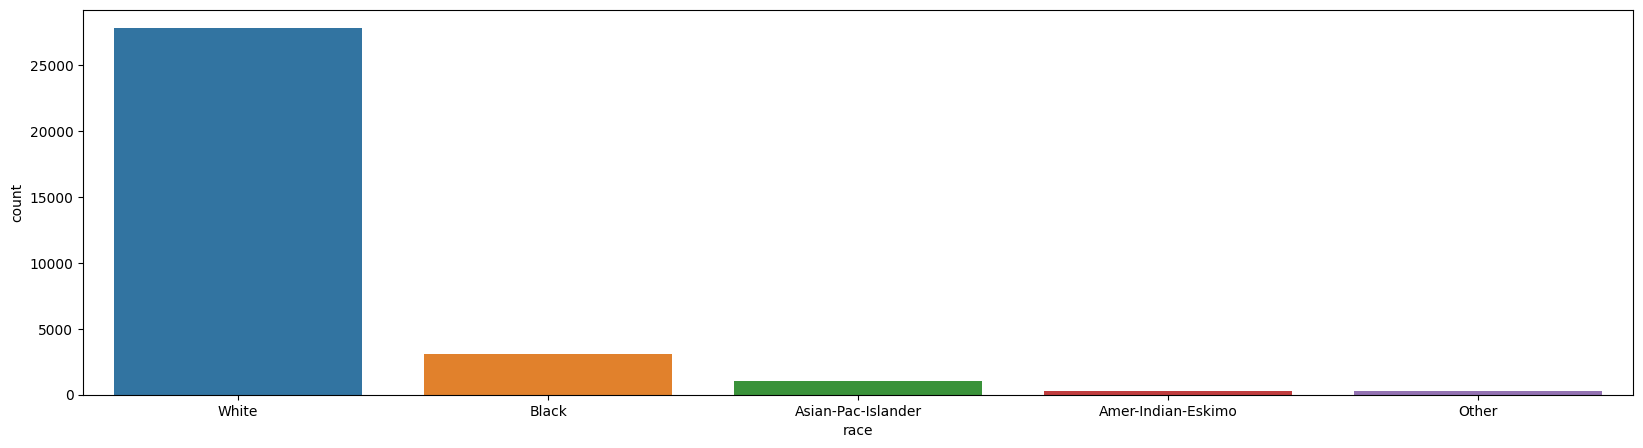

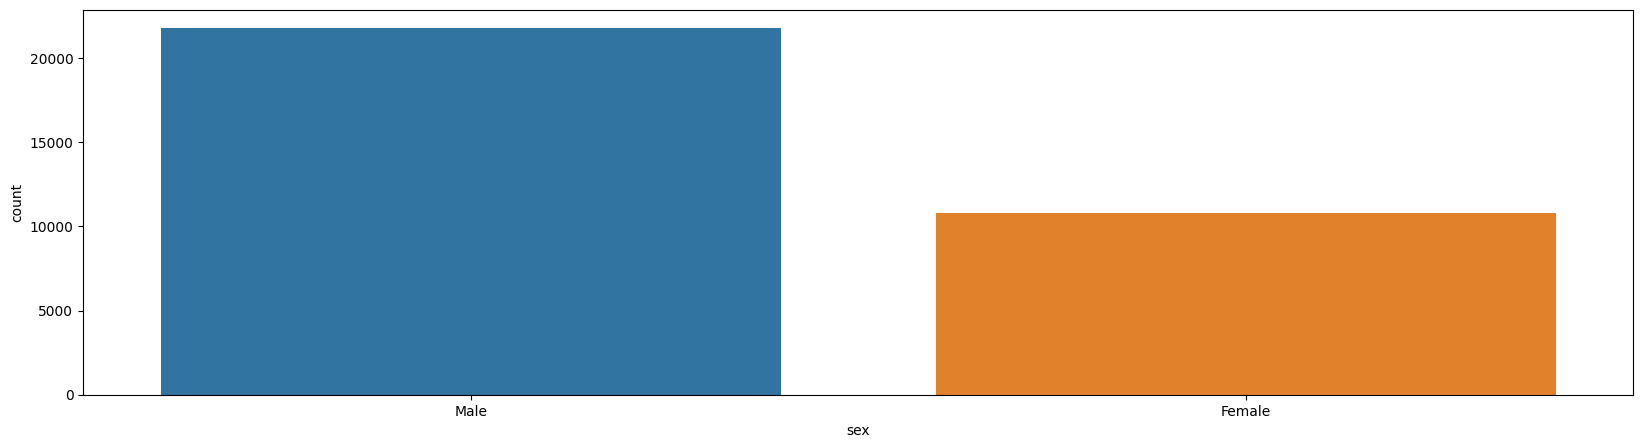

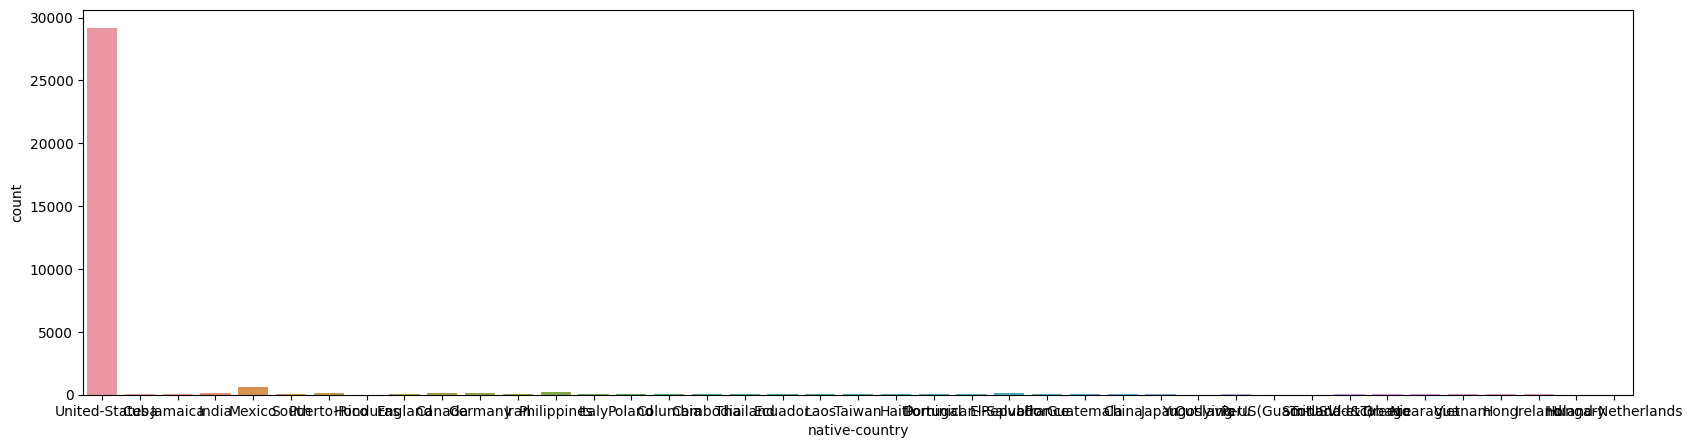

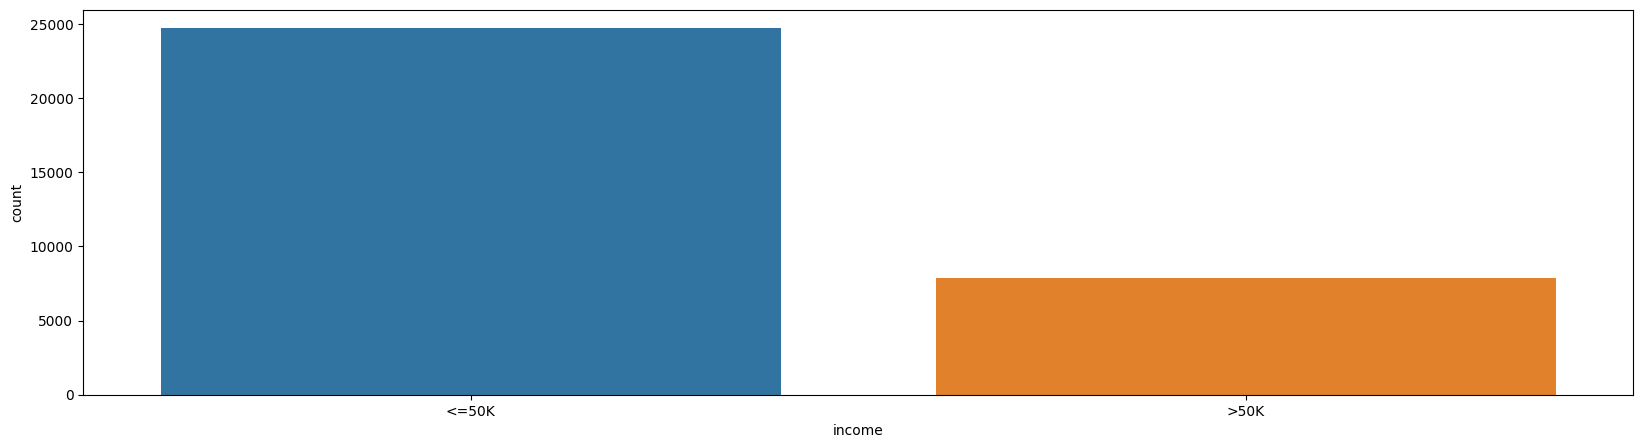

In [18]:
for i in cat_data.columns:
    plt.figure(figsize=(20, 5))
    sns.countplot(data= cat_data, x= i)

##### **Observações:**



*   A maioria das pessoas trabalha no setor privado, com outras distribuídas quase uniformemente entre vários empregos governamentais e como autonomos.
*   A maioria das pessoas possui diploma de Ensino Superior, do Ensino Médio ou cursou alguma faculdade. A distribuição é muito semelhante à dos anos de escolaridade (education-number), fato que pode ser melhor explorado.
*   A maioria das pessoas nunca se casou ou já se casou, e muito poucos se separaram ou ficaram viúvos.
*   As ocupações estão, em sua maioria, distribuídas de maneira uniforme e é difícil ver uma tendência quando há tantas categorias.
*   A maioria das pessoas são maridos ou não têm família.
*   A maioria das pessoas é branca, sendo os negros o único grupo etnico com número considerável na amostra.
*   Há mais homens do que mulheres na amostra, o que também pode ser inferido do facto de a maioria das pessoas serem maridos.
*   A grande maioria dos entrevistados é dos EUA.
*   Como comentado anteriormente, há muito mais pessoas com Baixa Renda (inferior a 50 mil), do que pessoas de Alta Renda (superior à 50 mil), o que mostra que os dados estão muito desequilibrados.

# **5. Engenharia de atributos**

A maioria dos atributos categóricos são muito confusos, com número excessivo de categorias. Então, podemos fazer uma engenharia de atributos para agrupar categorias semelhantes para aprimorar os atributos.

Começamos observando o número de categorias de cada variável categórica.

In [19]:
# Computando valores únicos de cada variável categórica

cat_rotulos = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
wkclass = data.workclass.unique()
edu = data.education.unique()
estciv = data['marital-status'].unique()
ocup = data.occupation.unique()
relat = data.relationship.unique()
race = data.race.unique()
sex = data.sex.unique()
country = data['native-country'].unique()

# Gerando um array com os valores únicos de cada variável.

data_col=[wkclass, edu, estciv, ocup, relat, race, sex, country]

# Uniformizando o tamanho dos arrays

cat_col = []
for i in data_col:
    cat_col.append(np.pad(i, (0, (len(country)-len(i))), 'empty'))
cat_col.append(country)

# Gerando o dataframe com os valores das variáveis categóricas.

categorias = pd.DataFrame(dict(zip(cat_rotulos, cat_col)))
categorias.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Black,Female,Cuba
2,State-gov,11th,Married-spouse-absent,Prof-specialty,Wife,Asian-Pac-Islander,None,Jamaica
3,Federal-gov,Masters,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,None,India
4,Local-gov,9th,Separated,Adm-clerical,Unmarried,Other,None,NaN


#### **Classe de trabalho** (*workclass*)

Iremos iniciar reduzindo o número de categorias da variável Classe de trabalho (workclass), agrupando diversas categorias que apresentam afinidade entre si, criando apenas 4 grupos representando setores distintos da economia, são eles:
*   Privado
*   Governo
*   Autônomo
*   Outros

<Axes: xlabel='workclass', ylabel='count'>

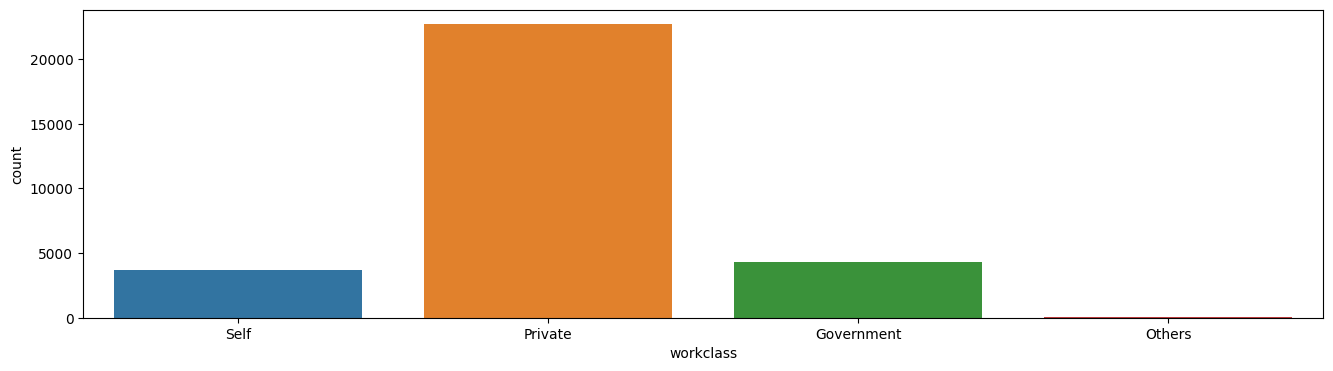

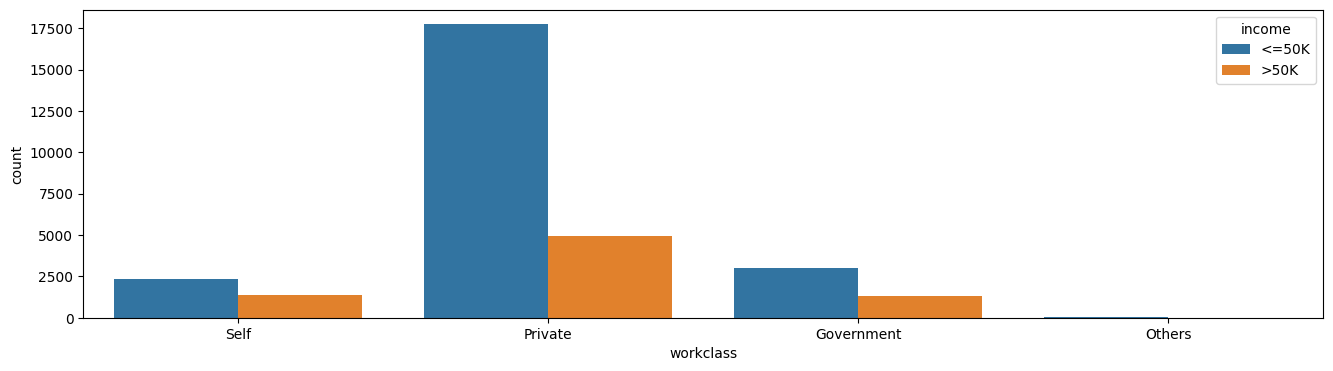

In [20]:
# Agrupando as classes de trabalho por afinidade.

data['workclass'].replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Government', inplace=True)
data['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self', inplace=True)
data['workclass'].replace(['Without-pay', 'Never-worked'], 'Others', inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='workclass')
plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='workclass', hue='income')

#### **Educação e Escolaridade** (*education* e *education-number*)

Verificando a interseção entre as variáveis Educação e Escolaridade

In [21]:
# Verificando a interseção entre educação e escolaridade.

data.groupby('education').nunique()['education-num']

education
10th            1
11th            1
12th            1
1st-4th         1
5th-6th         1
7th-8th         1
9th             1
Assoc-acdm      1
Assoc-voc       1
Bachelors       1
Doctorate       1
HS-grad         1
Masters         1
Preschool       1
Prof-school     1
Some-college    1
Name: education-num, dtype: int64

Isso implica que *Educação* (education) e *Escolaridade* (education-num) representam exatamente a mesma informação. E já está diretamente codificada na base de dados, então podemos usar apenas um dos dois e descartar o outro.

In [22]:
# Agrupando os níveis de escolaridd por afinidade.

data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School-Dropout', inplace=True)
data['education'].replace(['Some-college', 'Assoc-acdm', 'Assoc-voc'], 'College', inplace=True)
data['education'].replace('Prof-school', 'Masters', inplace=True)

<Axes: xlabel='education', ylabel='count'>

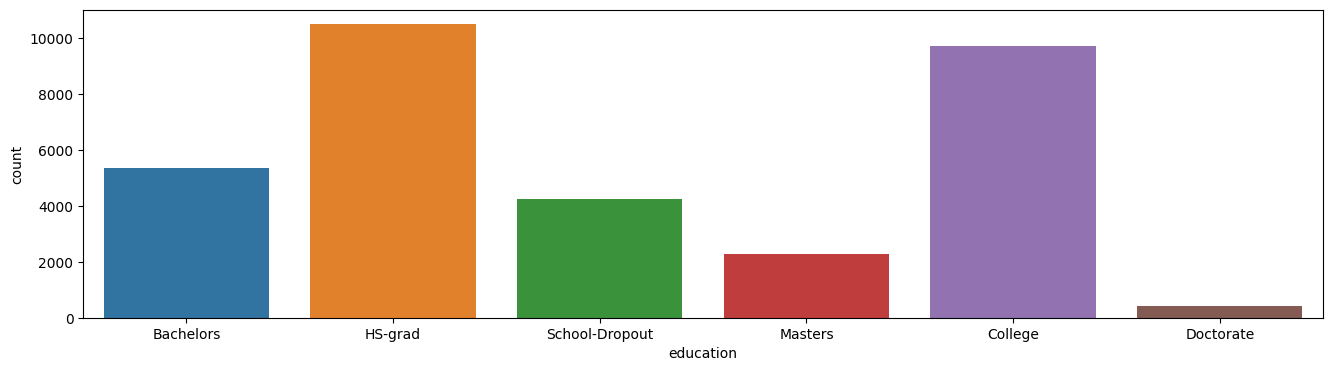

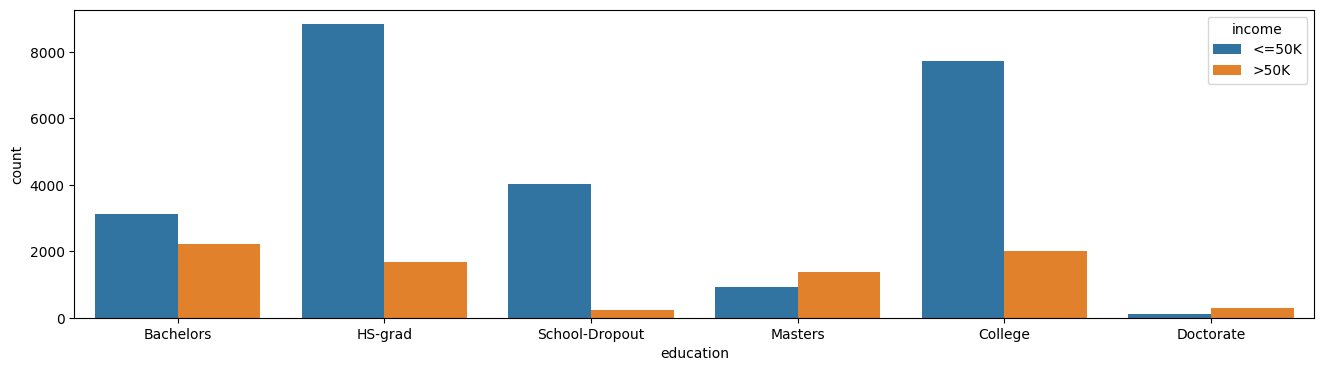

In [23]:
# Plotando os gráficos

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='education')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='education', hue='income')

##### **Observações:**

*   Mestres e Doutores são muito bem remunerados em comparação com demais níveis de ensino.
*   A maioria das pessoas de baixa renda abandonou o ensino básico ou concluiu apenas o ensino médio


#### **Estado Civil** (*marital-status*)

Iremos reduzir o número de categorias da variável Estado Civil (marital-status), agrupando diversas categorias que apresentam afinidade entre si, criando apenas 4 grupos representando setores distintos da economia, são eles:
*   Solteiro(a)
*   Casado(a)
*   Divorciado(a)
*   Viúvo(a)  

<Axes: xlabel='marital-status', ylabel='count'>

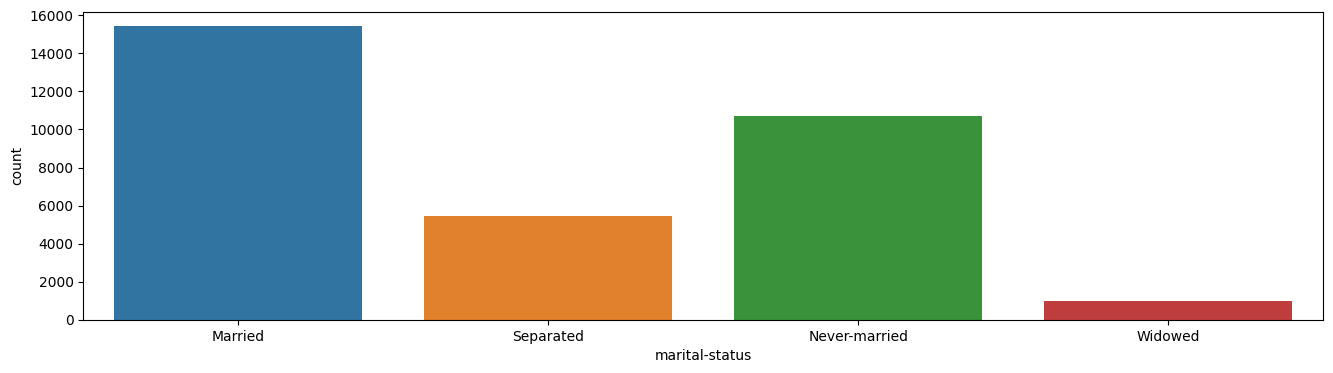

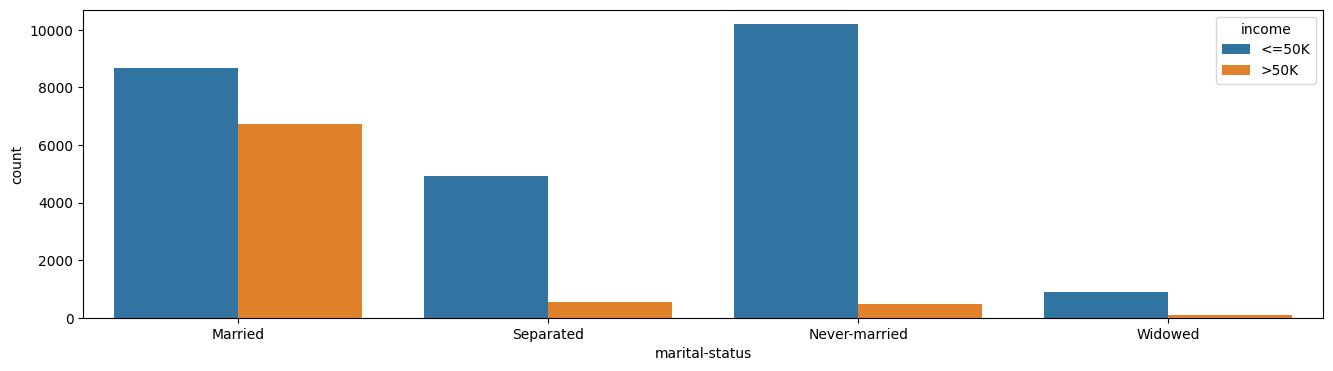

In [24]:
# Agrupando os estados civis por afinidade.

data['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
data['marital-status'].replace('Divorced', 'Separated',inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='marital-status')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='marital-status', hue='income')

##### **Observações:**

*   Quase todas as pessoas com renda superior a 50 mil são casadas.
*   As pessoas solteiras têm renda comparativamente muito mais baixa.

#### **Ocupação** (*occupation*)

Iremos iniciar reduzindo o número de categorias da variável Ocupação (occupation), agrupando diversas categorias pelo tipo de trabalho que desempenham, criando apenas 6 grupos representando setores distintos da economia, são eles:
*   Trabalhadores Operacional (Operários)
*   Trabalhadores Administrativo e Executivo
*   Trabalhadores do Conhecimento
*   Trabalhadores em Vendas e Serviços
*   Trabalhadores do Setor primário (agricultura, pecuária, pesca, extrativismo)
*   Militares

<Axes: xlabel='occupation', ylabel='count'>

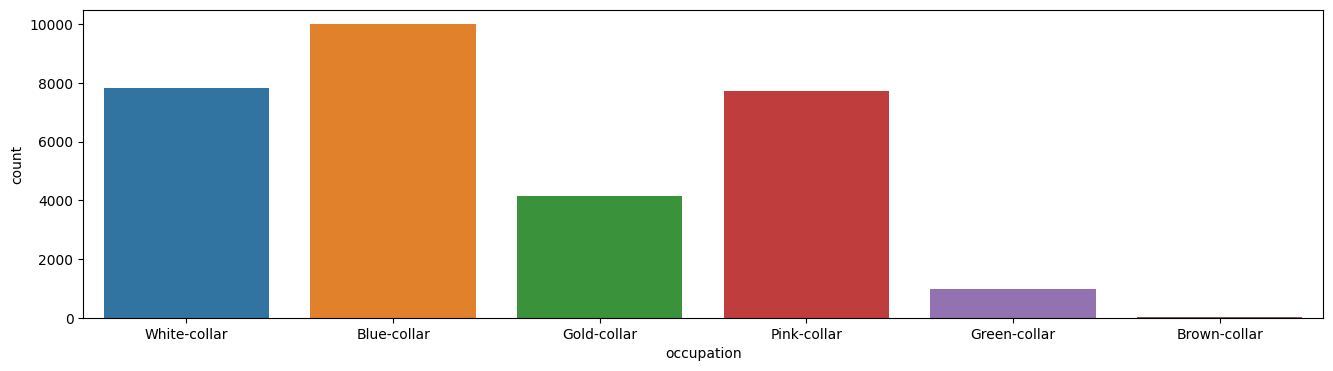

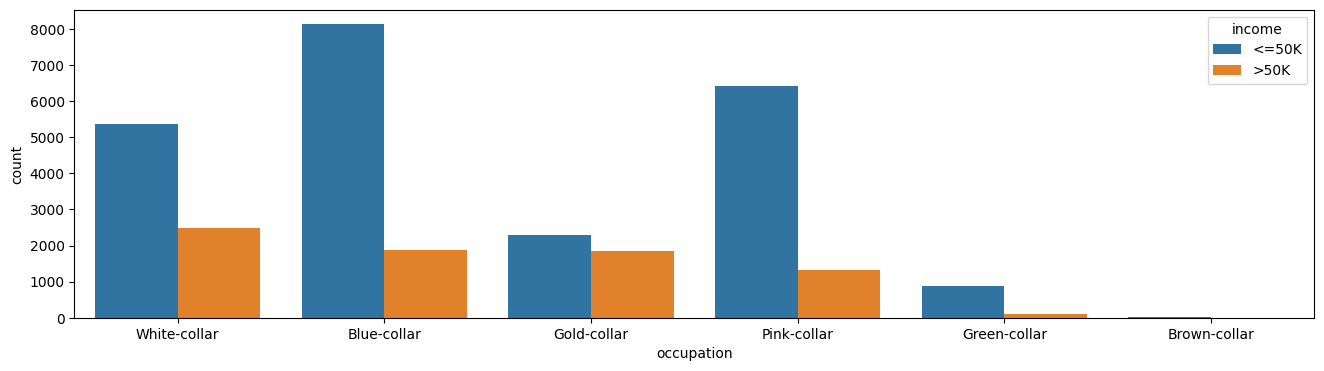

In [25]:
# Agrupando os ocupações por setor de trabalho.

data['occupation'].replace(['Tech-support', 'Craft-repair', 'Handlers-cleaners', 'Transport-moving', 'Machine-op-inspct'], 'Blue-collar', inplace=True)
data['occupation'].replace(['Exec-managerial', 'Adm-clerical'], 'White-collar', inplace=True)
data['occupation'].replace('Prof-specialty', 'Gold-collar', inplace=True)
data['occupation'].replace(['Other-service', 'Sales', 'Priv-house-serv', 'Protective-serv'], 'Pink-collar', inplace=True)
data['occupation'].replace('Farming-fishing', 'Green-collar', inplace=True)
data['occupation'].replace('Armed-Forces', 'Brown-collar', inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='occupation')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='occupation', hue='income')

##### **Observações:**

*   Operários e trabalhadores do setor de vendas e serviços têm a renda mais baixa.
*   Trabalhadores do conhecimento são as profissões mais bem pagas.

#### **País de origem** (*native-country*)

Iremos reduzie o número de categorias da variável Paíos de origem (native-country), agrupando as nacionalidades em 2 grupos distintos, são eles:
*   Estados Unidos
*   Outros

In [26]:
# Agrupando as nacionalidades em Estados Unidos e outros.

data['native-country'] = data['native-country'].map(lambda country: 'US' if country == 'United-States' else 'Other')

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self,83311,Bachelors,13,Married,White-collar,Husband,White,Male,0,0,13,US,<=50K
1,38,Private,215646,HS-grad,9,Separated,Blue-collar,Not-in-family,White,Male,0,0,40,US,<=50K
2,53,Private,234721,School-Dropout,7,Married,Blue-collar,Husband,Black,Male,0,0,40,US,<=50K
3,28,Private,338409,Bachelors,13,Married,Gold-collar,Wife,Black,Female,0,0,40,Other,<=50K
4,37,Private,284582,Masters,14,Married,White-collar,Wife,White,Female,0,0,40,US,<=50K


<Axes: xlabel='native-country', ylabel='count'>

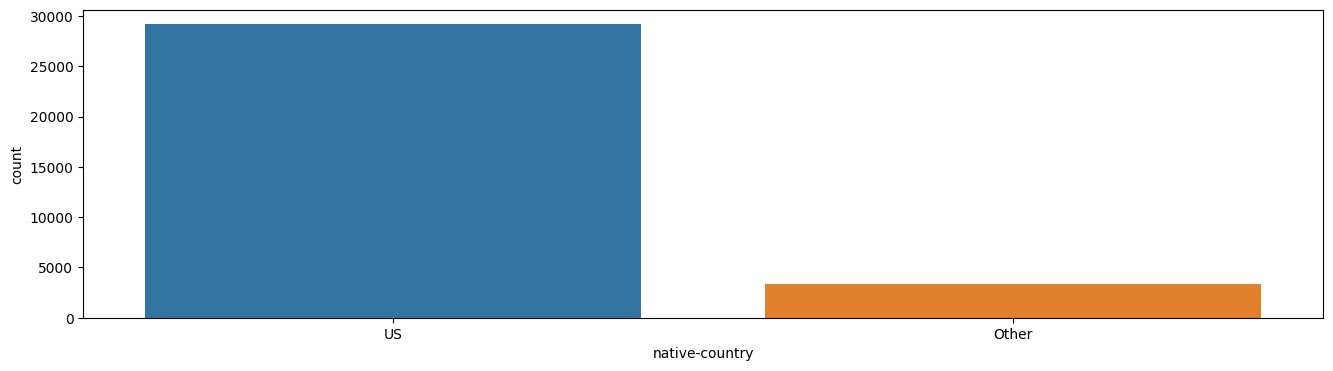

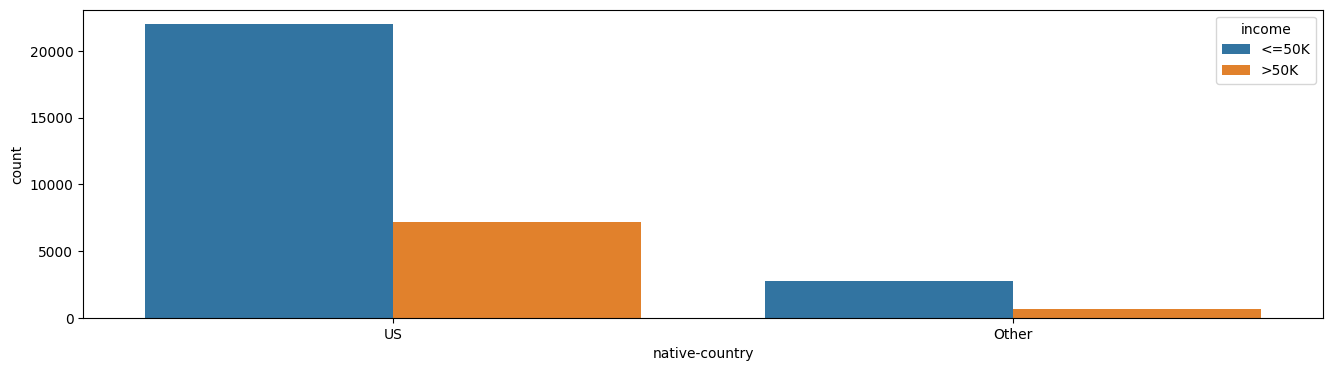

In [27]:
# Plotando os gráficos

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='native-country')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='native-country', hue='income')

##### **Observações:**

*   Há uma quantidade desproporcionalmente maior de pessoas nascidas nos Estados Unidos, portanto a maioria das pessoas de alta renda também provém desse país.

#### **Idade** (*age*)

 Separamos as diversas idades em faixas etárias, para melhor caracterizar a distribbuição de idades e rendas do dataset. E em seguida plotamos o gráfico Faixa etária versus renda.

<Axes: xlabel='age-range', ylabel='count'>

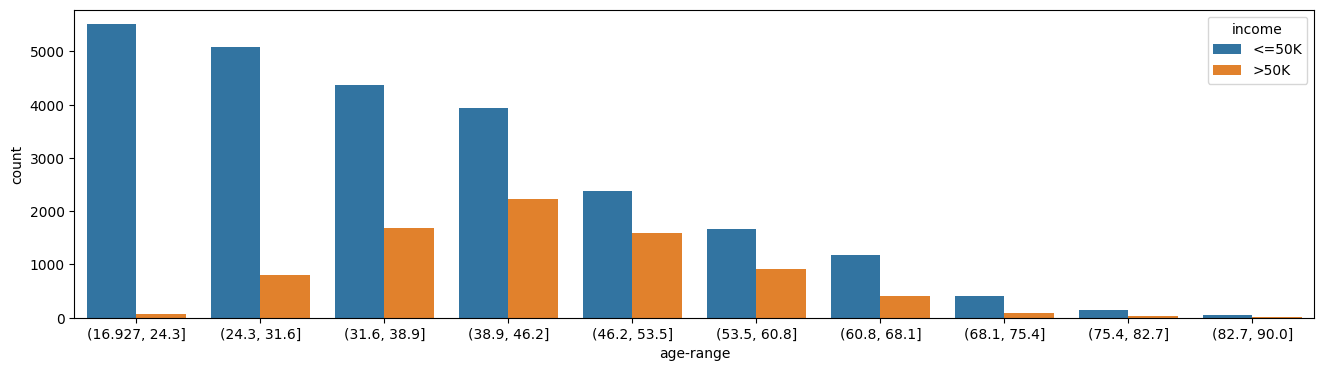

In [28]:
data['age-range']= pd.cut(data['age'], 10)

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='age-range', hue='income')

##### **Observações:**

*   Pessoas de maior renda tem idades na faixa dos 30 à 50 anos.
*   Pessoa jovens tem renda muito menor do que pessoas de meia-idade.

#### **Relacionamento familiar** (*relationship*)

Primeiro fazemos o gráfico das variáveis Relacionamento familiar versus a Renda.

<Axes: xlabel='relationship', ylabel='count'>

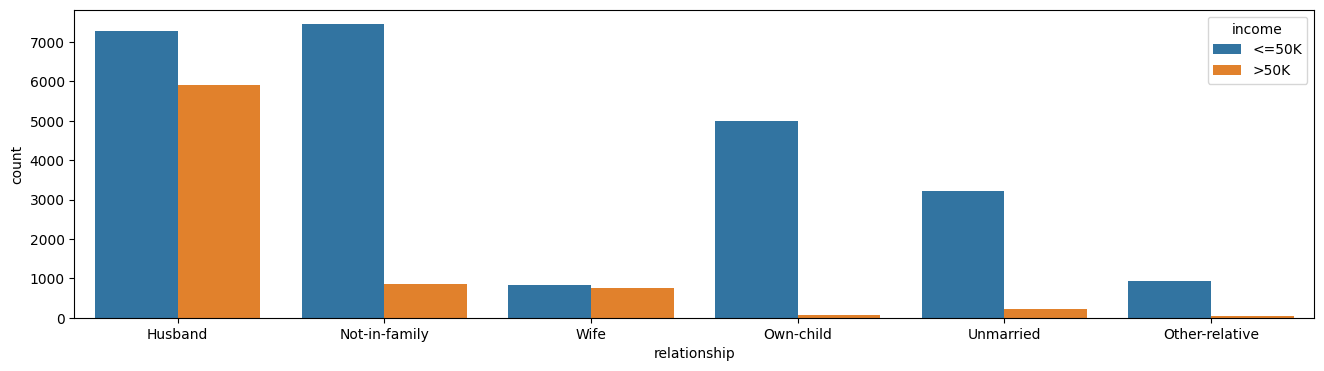

In [29]:
plt.figure(figsize=(16,4))
sns.countplot(data=data, x='relationship', hue='income')

##### **Observações:**

*   Maridos e esposas apresentam maior renda familiar, o que é condizente com o fato de que pessoas casadas ganham mais que os demais.

#### **Sexo** (*sex*)

Primeiro fazemos o gráfico das variáveis Sexo versus a Renda.

<Axes: xlabel='sex', ylabel='count'>

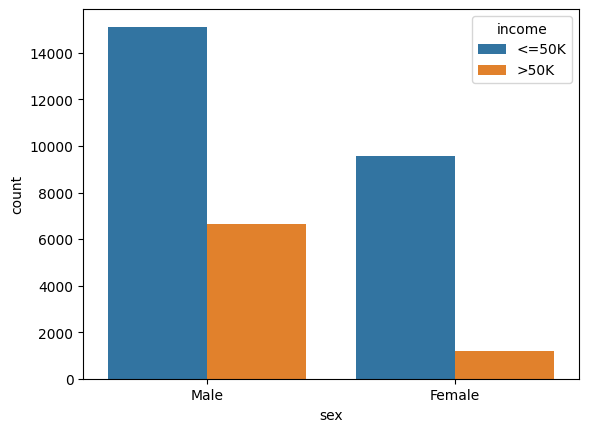

In [30]:
sns.countplot(data=data, x='sex', hue='income')

##### **Observações:**

*   Mais pessoas do sexo masculino tem alta renda do que do sexo feminino.

#### **Raça** (*race*)

Primeiro fazemos o gráfico das variáveis Raça versus a Renda.

<Axes: xlabel='race', ylabel='count'>

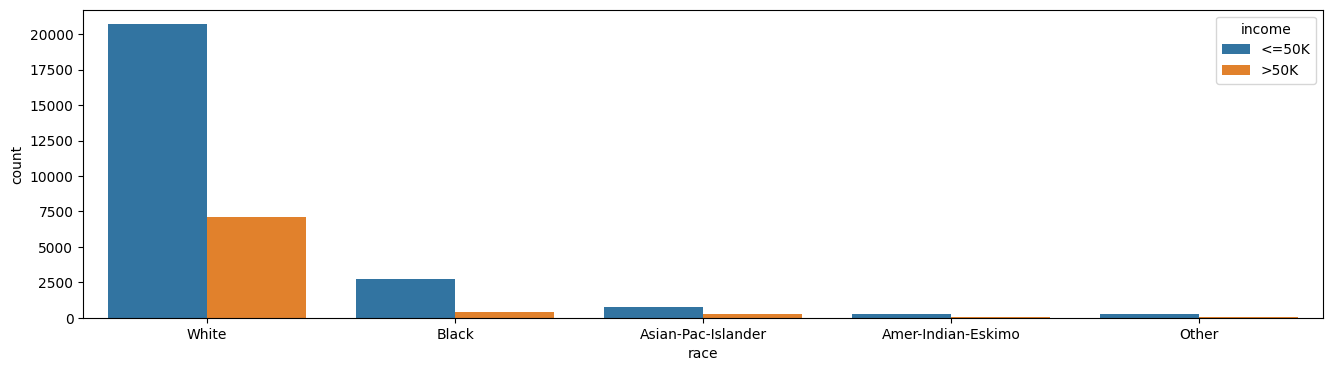

In [31]:
plt.figure(figsize=(16,4))
sns.countplot(data=data, x='race', hue='income')

##### **Observações:**

*   Como há muito mais pessoas brancas do que pertencentes à outras etnias, elas também apresentam maior renda. Entre as outras etnias, os negros são o grupo mais significativo em relação à renda.

#### **Horas (trabalhadas) por semana** (*hours-per-week*)

 Separamos as horas trabalhadas por semanas em intervalos para melhor caracterizar a distribbuição entre a quantidade de horas trabalhadas e a renda. E em seguida plotamos o gráfico das faixas de horas trabalhadas versus renda.

<Axes: xlabel='h/w-range', ylabel='count'>

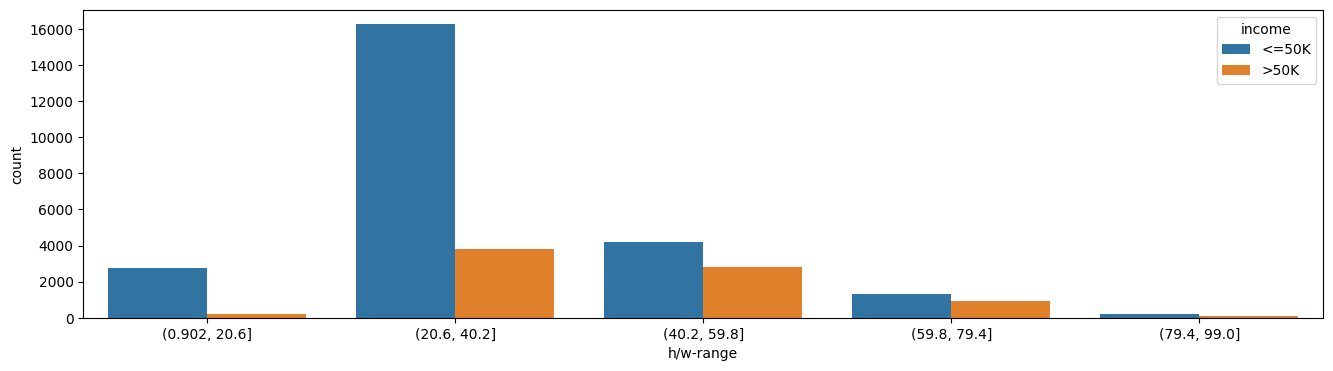

In [32]:
data['h/w-range']= pd.cut(data['hours-per-week'], 5)

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='h/w-range', hue='income')

##### **Observações:**

*   Pessoas com maior renda trabalham entre 20 e 60 horas semanais.

# **6. Processamento dos dados**

Para o processamento dos dados realizou-se os seguintes procedimentos:
*   Removeu-se outliers na variável ganho de capital para generalizar melhor os dados.
*   Para lidar com os valores ausentes removeu-se registros com quaisquer atributos nulos. Visto que não fará uma diferença significativa no treinamento, pois os registros nulos representam apenas cerca de 5% de todos os dados de treinamento.
*   Removeu-se duplicatas para evitar overfitting.
*   Descartou-se a variável **fnlwgt** porque é um recurso inútil.
*   Entre as variáveis Educação e Número de Educação, usamos apenas Número de Educação, pois contém toda a informação presente em Educação.
*   Combinou-se ganhos e perdas de capital para torná-lo um único recurso.
*   Todos os outros recursos permanecem inalterados.


In [33]:
# Removendo ouliers da variável ganho de capital
outliers= data[data['capital-gain'] > 40000].index
data= data.drop(outliers)

# Removendo linhas com valores faltantes ou duplicadas
data= data.dropna(how='any', axis=0)
data= data.drop_duplicates()

# Removendo as colunas fnlwgt e education
data= data.drop('fnlwgt', axis=1)
data= data.drop(columns='education')

# Combinando as colunas ganho e perda de capital em uma única coluna
data['capital-gain'] = data.apply(lambda capital: (capital['capital-gain'] - capital['capital-loss']), axis=1)

# Removendo demais colunas desnecessárias
data= data.drop(columns='capital-loss')
data= data.drop(columns='age-range')
data= data.drop(columns='h/w-range')

# verificando o novo dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30520 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30520 non-null  int64 
 1   workclass       30520 non-null  object
 2   education-num   30520 non-null  int64 
 3   marital-status  30520 non-null  object
 4   occupation      30520 non-null  object
 5   relationship    30520 non-null  object
 6   race            30520 non-null  object
 7   sex             30520 non-null  object
 8   capital-gain    30520 non-null  int64 
 9   hours-per-week  30520 non-null  int64 
 10  native-country  30520 non-null  object
 11  income          30520 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


Verifica-se que não há colunas com valores nulos.
Pode-se portanto verificar as estatísticas descritivas das colunas numéricas restantes.

In [34]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

Pode-se então verificar como ficaram as correlações após as alterações feitas nos atributos.

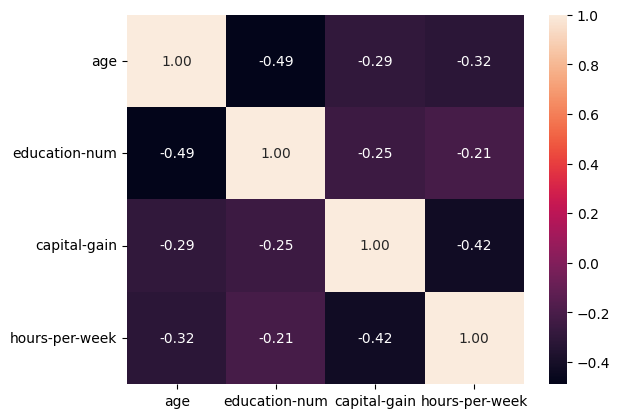

In [35]:
correlacao_nova = data[['age', 'education-num', 'capital-gain', 'hours-per-week']].corr()

heatMap(correlacao_nova)

##### **Observações:**

*   Houve uma melhora significativa nas correlações dos dados numéricos.
*   Pode-se, então, seguir para a construção do modelo.



# **7. Construção do modelo**

Importando os elementos necessários do Sci-Kit Learn.

In [36]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict
cv = KFold(6)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,classification_report)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

model = []
accuracy = []
f1 = []
auc = []

In [37]:
data = pd.get_dummies(data, drop_first=True)
data

,age,education-num,capital-gain,hours-per-week,workclass_Others,workclass_Private,workclass_Self,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_US,income_>50K
0,50,13,0,13,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,38,9,0,40,False,True,False,False,True,False,...,False,False,False,False,False,False,True,True,True,False
2,53,7,0,40,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
3,28,13,0,40,False,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,37,14,0,40,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,0,38,False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
32556,40,9,0,40,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
32557,58,9,0,40,False,True,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False
32558,22,9,0,20,False,True,False,True,False,False,...,True,False,False,False,False,False,True,True,True,False


Gerando os datasets de treino e normalizando os dados.

In [38]:
# Dividindo o dataset
X = data[data.columns[:-1]]
y = data[data.columns[-1]]


In [39]:
# Normalizando os dados

scaler = StandardScaler().fit(X)
x_scaled = scaler.transform(X)

Importando o Dummy Classifier.

In [40]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent', random_state = 0)
model.append("dummy")
accuracy.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='roc_auc').mean())

Gerando modelo de Regressão Logística.

In [41]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent', random_state = 0)
model.append("dummy")
accuracy.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(dummy, x_scaled, y, cv=cv, scoring='roc_auc').mean())

In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(logreg, param_grid, cv=6).fit(x_scaled, y)

print("Logistic Regression: ", grid.best_score_, grid.best_params_)

Logistic Regression:  0.8359112395942531 {'C': 0.01}


Importando modelo de Support Vector Machines

from sklearn.svm import SVC

svc = SVC()

param_grid = {'C': [0.5, 1, 3, 6, 10], 'kernel': ['rbf']}
grid1 = GridSearchCV(svc, param_grid, cv=cv).fit(x_scaled, y)

print("SVC: ", grid1.best_score_, grid1.best_params_)

svc = grid1.best_estimator_

model.append("SVC")
accuracy.append(cross_val_score(svc, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(svc, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(svc, x_scaled, y, cv=cv, scoring='roc_auc').mean())

Importando modelo de Classificador por Árvore de Decisões

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

param_grid = {'max_depth': [5, 10, 50, 100, None],
            'criterion': ['gini','entropy','log_loss'],
            'random_state':[0]}
grid2 = GridSearchCV(dtc, param_grid, cv=cv,n_jobs=-1).fit(x_scaled, y)

print("DTC: ", grid2.best_score_, grid2.best_params_)

DTC:  0.8504916021070829 {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}


In [93]:
print(classification_report(y, cross_val_predict(dtc, x_scaled, y, cv=cv,n_jobs=-1),digits=4))
print(cross_val_score(dtc, x_scaled, y, cv=cv, scoring='roc_auc',n_jobs=-1).mean())

              precision    recall  f1-score   support

       False     0.8706    0.8829    0.8767     23028
        True     0.6238    0.5968    0.6100      7492

    accuracy                         0.8127     30520
   macro avg     0.7472    0.7398    0.7434     30520
weighted avg     0.8101    0.8127    0.8113     30520

0.7699263656990077


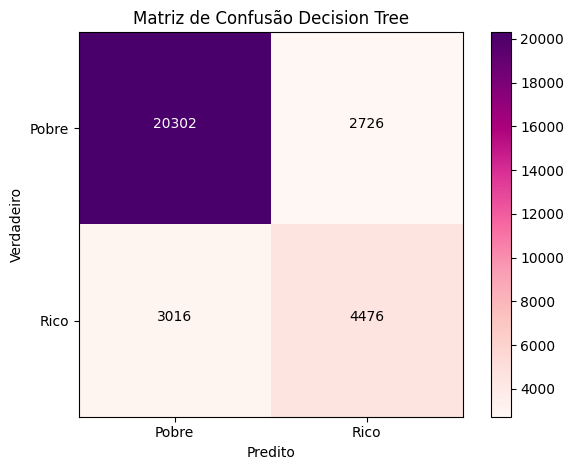

In [115]:
# Criar a matriz de confusão
cm = confusion_matrix(y, cross_val_predict(dtc, x_scaled, y, cv=cv,n_jobs=-1))

# Plotar a matriz de confusão
#fig = plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Matriz de Confusão Decision Tree')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Pobre', 'Rico'])
plt.yticks(tick_marks, ['Pobre', 'Rico'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Adicionar os valores na matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

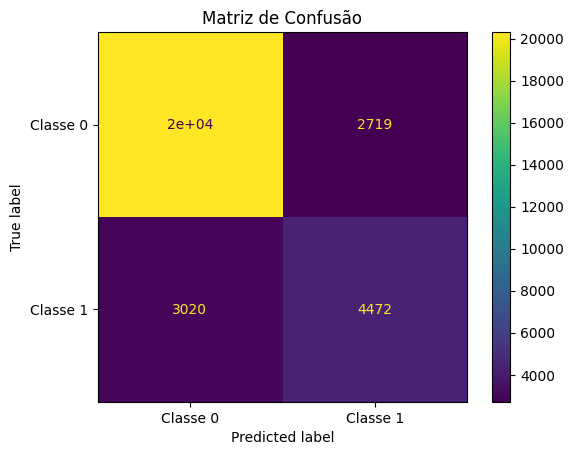

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

# Criar a visualização da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])

# Plotar a matriz de confusão
disp.plot()
plt.title('Matriz de Confusão')
plt.show()

In [44]:
dtc = grid2.best_estimator_

model.append("Decision Tree")
accuracy.append(cross_val_score(dtc, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(dtc, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(dtc, x_scaled, y, cv=cv, scoring='roc_auc').mean())

Importando modelo de Árvore Aleatória

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

#param_grid = {'n_estimators': [200, 400, 600]}
#OUTPUT:
#RFC:  0.8409292416037498 {'n_estimators': 400}

rfc_ = RandomForestClassifier(n_estimators=400, random_state=0)
param_grid= {'criterion': ['gini','entropy','log_loss'], 'max_depth': [10,50,100,None],
            'random_state':[0]}
grid3 = GridSearchCV(rfc_, param_grid, cv=cv,n_jobs=-1).fit(x_scaled, y)

print("RFC: ", grid3.best_score_, grid3.best_params_)

RFC:  0.8519005894628379 {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}


In [91]:

print(classification_report(y, cross_val_predict(rfc, x_scaled, y, cv=cv,n_jobs=-1),digits=4))
print(cross_val_score(rfc, x_scaled, y, cv=cv, scoring='roc_auc',n_jobs=-1).mean())

              precision    recall  f1-score   support

       False     0.8790    0.9143    0.8963     23028
        True     0.6995    0.6131    0.6534      7492

    accuracy                         0.8404     30520
   macro avg     0.7892    0.7637    0.7749     30520
weighted avg     0.8349    0.8404    0.8367     30520

0.8851796804785305


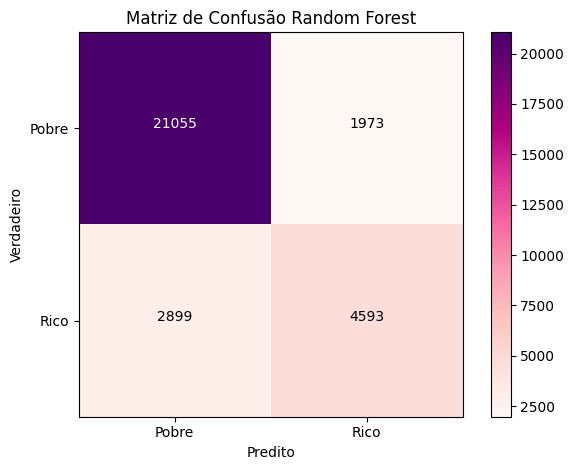

In [114]:
# Criar a matriz de confusão
cm = confusion_matrix(y, cross_val_predict(rfc, x_scaled, y, cv=cv,n_jobs=-1))

# Plotar a matriz de confusão
#fig = plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdPu)
plt.title('Matriz de Confusão Random Forest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Pobre', 'Rico'])
plt.yticks(tick_marks, ['Pobre', 'Rico'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Adicionar os valores na matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [54]:
rfc = grid3.best_estimator_

model.append("Random Forest")
accuracy.append(cross_val_score(rfc, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(rfc, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(rfc, x_scaled, y, cv=cv, scoring='roc_auc').mean())

Importando modelo MLPC

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0, activation='relu', solver='adam', max_iter = 500)

param_grid = {'hidden_layer_sizes': [(50,50), (100,)], 'alpha': [0.0001, 0.05]}
grid4 = GridSearchCV(mlp, param_grid, cv=cv).fit(x_scaled, y)

print("Grid MLP: ", grid4.best_score_, grid4.best_params_)

In [ ]:
mlp = grid4.best_estimator_

model.append("MLP")
accuracy.append(cross_val_score(mlp, x_scaled, y, cv=cv, scoring='accuracy').mean())
f1.append(cross_val_score(mlp, x_scaled, y, cv=cv, scoring='f1').mean())
auc.append(cross_val_score(mlp, x_scaled, y, cv=cv, scoring='roc_auc').mean())

Gerando tabela com as métricas de performance de cada modelo de classificador em Machine Leaning.

In [49]:
models = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'F1 Score': f1, 'AUC': auc})
print("model evaluation: ")
models

model evaluation: 


,Model,Accuracy,F1 Score,AUC
0,dummy,0.755,0.000,0.500
1,dummy,0.755,0.000,0.500
2,Decision Tree,0.850,0.651,0.893
3,Random Forest,0.852,0.636,0.909


Os melhores resultados nos dados de treino foram obtidos com o Classificador de Floresta Aleatória.

# **8. Aplicação do modelo aos dataset de testes**

Carregando o dataset de testes.

In [ ]:
test= pd.read_csv('adult.test', sep=', ', names=colunas, na_values='?', engine='python', skiprows=1)
test.info()

Processando o dataset de testes

In [ ]:
test= test.dropna(how='any', axis=0)
test= test.drop_duplicates()
test= test.drop('fnlwgt', axis=1)
test= test.drop(columns='education')

test['capital-gain']= test.apply(lambda x: (x['capital-gain'] - x['capital-loss']), axis=1)
test= test.drop(columns='capital-loss')

test.info()

Realizando engenharia de atributos no dataset de testes.

In [ ]:
test['workclass'].replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Government', inplace=True)
test['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self', inplace=True)
test['workclass'].replace(['Without-pay', 'Never-worked'], 'Others', inplace=True)

test['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
test['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
test['marital-status'].replace('Divorced', 'Separated',inplace=True)

test['occupation'].replace(['Tech-support', 'Craft-repair', 'Handlers-cleaners', 'Transport-moving', 'Machine-op-inspct'], 'Blue-collar', inplace=True)
test['occupation'].replace(['Exec-managerial', 'Adm-clerical'], 'White-collar', inplace=True)
test['occupation'].replace('Prof-specialty', 'Gold-collar', inplace=True)
test['occupation'].replace(['Other-service', 'Sales', 'Priv-house-serv', 'Protective-serv'], 'Pink-collar', inplace=True)
test['occupation'].replace('Farming-fishing', 'Green-collar', inplace=True)
test['occupation'].replace('Armed-Forces', 'Brown-collar', inplace=True)

test['native-country']= test['native-country'].map(lambda country: 'US' if country == 'United-States' else 'Other')

In [ ]:
test = pd.get_dummies(test, drop_first=True)
test

Preparando o dataset de testes para rodar o modelo.

In [ ]:
Xtest = test[test.columns[:-1]]
ytest = test[test.columns[-1]]

scaler = StandardScaler().fit(Xtest)
xtest_scaled = scaler.transform(Xtest)

In [ ]:
xtest_scaled.shape

Rodando o modelo para gerar previsões

In [ ]:
y_pred= rfc.predict(xtest_scaled)

In [ ]:
accuracy_score(ytest, y_pred)

O Classificador de floresta aleatória conseguiu uma acurácia nas previsões de 83,35% no dataset de testes, uma pequena queda se comparado com os 85,62% obtidos no dataset de de treino. O que é uma boa métrica, uma vez que não há overfitting aos dados.